**Importaciones**

In [1]:
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

**Carga de datos**

In [2]:
housing = fetch_california_housing()

**Conjuntos de entrenamiento, validación y prueba**

In [3]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('X_valid: ', X_valid.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)
print('y_valid: ', y_valid.shape)

X_train:  (11610, 8)
X_test:  (5160, 8)
X_valid:  (3870, 8)
y_train:  (11610,)
y_test:  (5160,)
y_valid:  (3870,)


**Escalado de datos**

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

**Creación del modelo**

In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

**Compilación del modelo**

In [7]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=[keras.metrics.RootMeanSquaredError(),'mean_absolute_percentage_error'])

**Entrenamiento del modelo**

In [8]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 1.0545 - root_mean_squared_error: 1.0269 - mean_absolute_percentage_error: 37.4423 - val_loss: 0.5536 - val_root_mean_squared_error: 0.7441 - val_mean_absolute_percentage_error: 30.0747
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 1.8721 - root_mean_squared_error: 1.3682 - mean_absolute_percentage_error: 31.9481 - val_loss: 0.4505 - val_root_mean_squared_error: 0.6712 - val_mean_absolute_percentage_error: 27.6323
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6158 - root_mean_squared_error: 0.7847 - mean_absolute_percentage_error: 30.4033 - val_loss: 1.3102 - val_root_mean_squared_error: 1.1447 - val_mean_absolute_percentage_error: 28.6617
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 2.5655 - root_mean_squared_error: 1.6017 - mean_absolute_percentage_error: 35.2881 - val_loss: 0.4193 - val_root_mean_squared_error: 0.6475 - val_

**Gráfica del historial de rendimiento**

<Axes: >

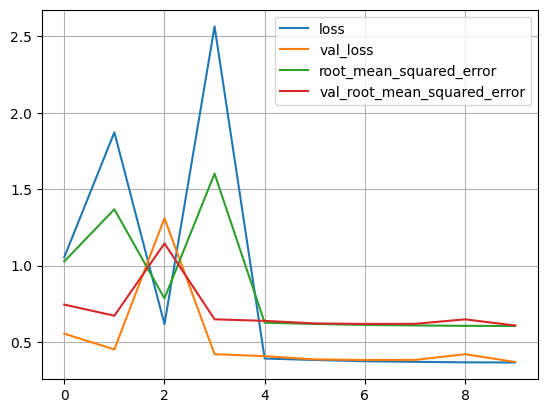

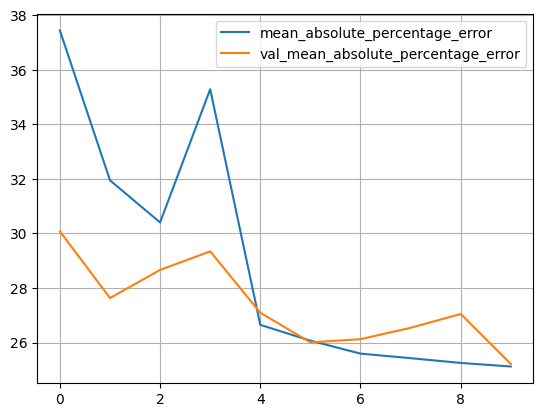

In [9]:
dfHistory = pd.DataFrame(history.history)
dfHistory[['loss', 'val_loss', 'root_mean_squared_error', 'val_root_mean_squared_error']].plot(grid=True)
dfHistory[['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error']].plot(grid=True)

**Evaluación del modelo**

In [13]:
# Evaluación en el conjunto de entrenamiento
loss, RMSE, MAPE = model.evaluate(X_train, y_train)
print('Evaluar el modelo en el conjunto de entrenamiento')
print('loss train: ', loss)
print('root_mean_squared_error_train: ', RMSE)
print('mean_absolute_percentage_error_train: ', MAPE)

#Evaluación en el conjunto de validación
loss, RMSE, MAPE = model.evaluate(X_valid, y_valid)
print('Evaluar el modelo en el conjunto de validación')
print('loss valid: ', loss)
print('root_mean_squared_error_valid: ', RMSE)
print('mean_absolute_percentage_error_valid: ', MAPE)

#Evaluación del modelo en el conjunto de prueba
loss, RMSE, MAPE = model.evaluate(X_test, y_test)
print('Evaluar el modelo en el conjunto de prueba')
print('loss test: ', loss)
print('root_mean_squared_error_test: ', RMSE)
print('mean_absolute_percentage_error_test: ', MAPE)


363/363 [==============================] - 1s 3ms/step - loss: 0.3582 - root_mean_squared_error: 0.5985 - mean_absolute_percentage_error: 25.0482
Evaluar el modelo en el conjunto de entrenamiento
loss train:  0.35816919803619385
root_mean_squared_error_train:  0.5984724164009094
mean_absolute_percentage_error_train:  25.048198699951172
121/121 [==============================] - 0s 2ms/step - loss: 0.3684 - root_mean_squared_error: 0.6069 - mean_absolute_percentage_error: 25.2152
Evaluar el modelo en el conjunto de validación
loss valid:  0.3683677315711975
root_mean_squared_error_valid:  0.606933057308197
mean_absolute_percentage_error_valid:  25.215198516845703
162/162 [==============================] - 0s 2ms/step - loss: 0.3637 - root_mean_squared_error: 0.6031 - mean_absolute_percentage_error: 25.6292
Evaluar el modelo en el conjunto de prueba
loss test:  0.36371898651123047
root_mean_squared_error_test:  0.6030911803245544
mean_absolute_percentage_error_test:  25.629209518432617
